/home/lincy/.local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


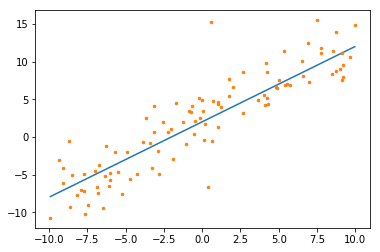

In [1]:
###
###   Linear regression
###
from __future__ import print_function
    
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

tf.reset_default_graph()
N=100

# Training data : (X, Y) 
x_train = np.sort( np.random.uniform(-10,10,N) ).reshape(N,1)    #  np.linspace(-10, 10, N).reshape(N,1)     # colume vector
w, b = 1, 2
y_exact = (w*x_train + b).reshape(N,1)
y_train       =  y_exact  + np.random.normal(0, 3, size=x_train.shape)

# plot data
plt.plot(x_train, y_exact)
plt.plot(x_train, y_train, '.', markersize=5)
plt.show()


Epoch:    0  loss=   0.15642  W=1.086322 B=0.872710
Epoch:   20  loss=  0.159247  W=0.956310 B=2.140880
Epoch:   40  loss=  0.159412  W=0.950107 B=2.201091
Epoch:   60  loss=   0.15942  W=0.949813 B=2.203948
Epoch:   80  loss=   0.15942  W=0.949799 B=2.204089
Epoch:  100  loss=   0.15942  W=0.949798 B=2.204097
Epoch:  120  loss=   0.15942  W=0.949798 B=2.204097
Epoch:  140  loss=   0.15942  W=0.949798 B=2.204097
Epoch:  160  loss=   0.15942  W=0.949798 B=2.204097
Epoch:  180  loss=   0.15942  W=0.949798 B=2.204097
Done.


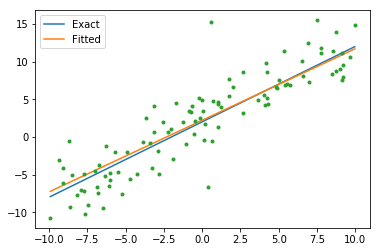

In [2]:
LRATE = 0.1
EPOCHS  = 200
MONITOR = 20

# tf Graph Input
X = tf.placeholder("float32")
Y = tf.placeholder("float32")

# Construct a linear model
W       = tf.Variable(np.random.random(), name="weight")
B       = tf.Variable(np.random.random(), name="bias")
output  = tf.add(tf.multiply(X, W), B)
# Gradient descent
loss_op = tf.reduce_sum(tf.pow(output-Y, 2))/(N)    ## least square fitting
optimizer = tf.train.GradientDescentOptimizer(LRATE).minimize(loss_op)

# Start training
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())   ### initialize all variable first.

    # Fit all training data
    for epoch in range(EPOCHS):
        for (x, y) in zip(x_train, y_train):
            _, loss = sess.run([optimizer, loss_op], feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if epoch % MONITOR == 0:
            print ("Epoch: %4d  loss=%10g  W=%5f B=%5f" % (epoch, loss, sess.run(W), sess.run(B) )  )

    print ("Done.")

    #Graphic display
    plt.plot(x_train, y_exact, label='Exact')
    plt.plot(x_train, sess.run(W) * x_train + sess.run(B), label='Fitted')
    plt.plot(x_train, y_train, '.')
    plt.legend()
    plt.show()

Epoch:    0  loss=   10.7425  W=0.924862 B=0.504157
Epoch:   20  loss=   9.48605  W=0.893383 B=0.864455
Epoch:   40  loss=   8.79167  W=0.870003 B=1.131516
Epoch:   60  loss=    8.3864  W=0.852656 B=1.329291
Epoch:   80  loss=   8.13721  W=0.839799 B=1.475638
Epoch:  100  loss=   7.97688  W=0.830278 B=1.583851
Epoch:  120  loss=   7.86994  W=0.823233 B=1.663813
Epoch:  140  loss=   7.79666  W=0.818025 B=1.722864
Epoch:  160  loss=   7.74547  W=0.814176 B=1.766448
Epoch:  180  loss=   7.70922  W=0.811333 B=1.798600
Done.


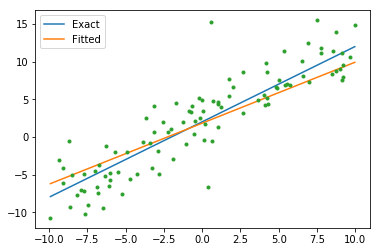

In [3]:
###
###  Modified to support BATCH training --  faster (and more easily conver)
###

LRATE = 0.01
EPOCHS   = 200
MONITOR = 20
BATCH=10

IN  = 1
OUT = 1 
# tf Graph Input
X = tf.placeholder(tf.float32, [BATCH, IN])
Y = tf.placeholder(tf.float32, [BATCH, OUT])

# Construct a linear model
W       = tf.Variable(np.random.random([IN   , OUT]),  name="weight", dtype=tf.float32)
B       = tf.Variable(np.random.random([BATCH, OUT]),  name="bias"  , dtype=tf.float32)
output  = tf.add(tf.matmul(X, W), B)   ###   [BATCH, IN].[IN, OUT] + .. = [BATCH, OUT] 
W_mean = tf.reduce_mean(W)
B_mean = tf.reduce_mean(B)
# Gradient descent
loss_op = tf.reduce_mean(tf.pow(output-Y, 2))    ## least square fitting
optimizer = tf.train.GradientDescentOptimizer(LRATE).minimize(loss_op)

# Start training
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())   ### initialize all variable first.

    # Fit all training data
    for epoch in range(EPOCHS):
        STEPS = int(N/BATCH)
        for i in range(STEPS):
            x_ = x_train[i*BATCH:(i+1)*BATCH, :]
            y_ = y_train[i*BATCH:(i+1)*BATCH, :]
            _, loss = sess.run([optimizer, loss_op], feed_dict={X: x_, Y: y_})

        #Display logs per epoch step
        if epoch % MONITOR == 0:
            print ("Epoch: %4d  loss=%10g  W=%5f B=%5f" % (epoch, loss, sess.run(W_mean), sess.run(B_mean) )  )

    print ("Done.")

    #Graphic display
    plt.plot(x_train, y_exact, label='Exact')
    plt.plot(x_train, sess.run(W_mean) * x_train + sess.run(B_mean), label='Fitted')
    plt.plot(x_train, y_train, '.')
    plt.legend()
    plt.show()